In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_enem = pd.read_csv("data/enem.csv", encoding='latin-1', sep=";")

# Questão 1

# Questão 2

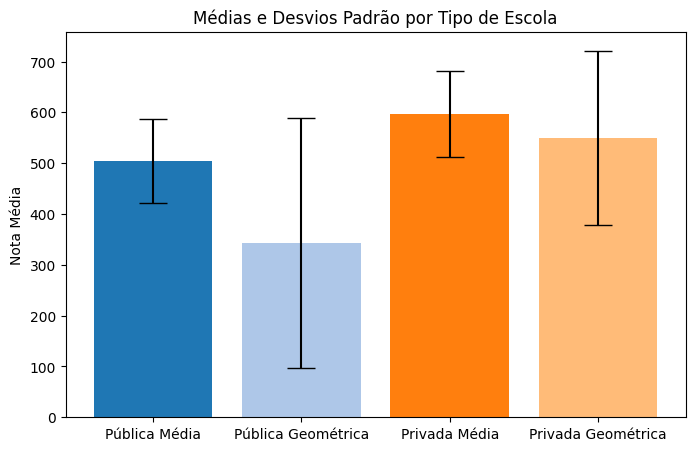

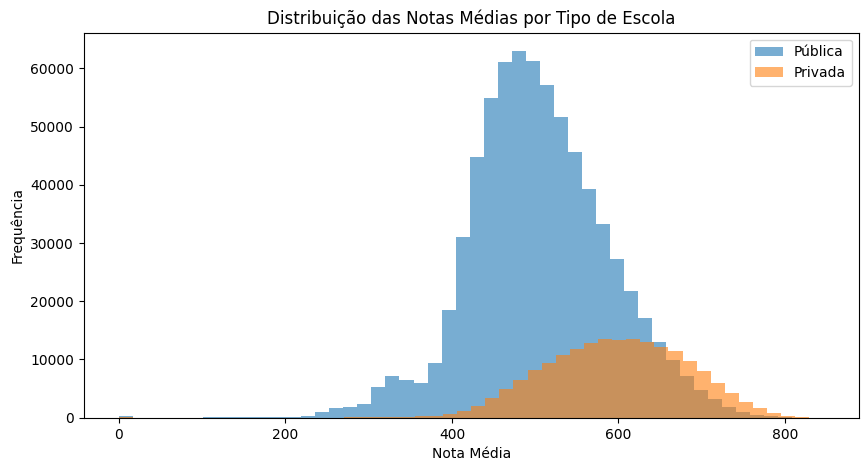

C:\Users\alunok10.UNIFOR\AppData\Local\Temp\ipykernel_9912\3503822536.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


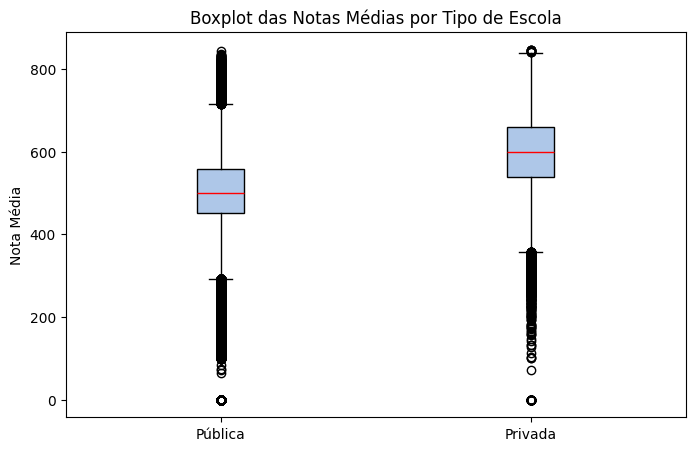

C:\Users\alunok10.UNIFOR\AppData\Local\Temp\ipykernel_9912\3503822536.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


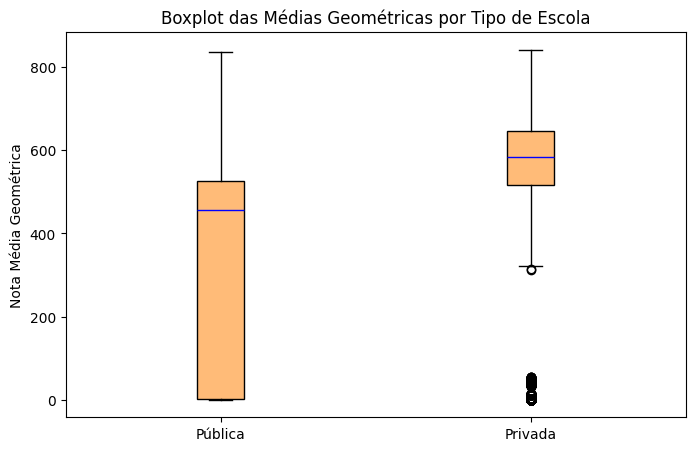

In [4]:
df_enem['NU_MEDIA'] = df_enem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)
df_enem['NU_MEDIA_GEOMETRICA'] = df_enem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].prod(axis=1)**(1/5)
df_escola_publica = df_enem[df_enem["TP_ESCOLA"] == 2]
df_escola_privada = df_enem[df_enem["TP_ESCOLA"] == 3]
medias = [
    df_escola_publica['NU_MEDIA'].mean(),
    df_escola_publica['NU_MEDIA_GEOMETRICA'].mean(),
    df_escola_privada['NU_MEDIA'].mean(),
    df_escola_privada['NU_MEDIA_GEOMETRICA'].mean()
]

stds = [
    df_escola_publica['NU_MEDIA'].std(),
    df_escola_publica['NU_MEDIA_GEOMETRICA'].std(),
    df_escola_privada['NU_MEDIA'].std(),
    df_escola_privada['NU_MEDIA_GEOMETRICA'].std()
]

labels = [
    'Pública Média',
    'Pública Geométrica',
    'Privada Média',
    'Privada Geométrica'
]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, medias, yerr=stds, capsize=10, color=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])
plt.ylabel('Nota Média')
plt.title('Médias e Desvios Padrão por Tipo de Escola')
plt.show()

# Distribuição das médias
plt.figure(figsize=(10, 5))
plt.hist(df_escola_publica['NU_MEDIA'].dropna(), bins=50, alpha=0.6, label='Pública', color='#1f77b4')
plt.hist(df_escola_privada['NU_MEDIA'].dropna(), bins=50, alpha=0.6, label='Privada', color='#ff7f0e')
plt.xlabel('Nota Média')
plt.ylabel('Frequência')
plt.title('Distribuição das Notas Médias por Tipo de Escola')
plt.legend()
plt.show()

# Boxplot das médias
plt.figure(figsize=(8, 5))
plt.boxplot(
    [df_escola_publica['NU_MEDIA'].dropna(), df_escola_privada['NU_MEDIA'].dropna()],
    labels=['Pública', 'Privada'],
    patch_artist=True,
    boxprops=dict(facecolor='#aec7e8'),
    medianprops=dict(color='red')
)
plt.ylabel('Nota Média')
plt.title('Boxplot das Notas Médias por Tipo de Escola')
plt.show()

# Boxplot das médias geométricas
plt.figure(figsize=(8, 5))
plt.boxplot(
    [df_escola_publica['NU_MEDIA_GEOMETRICA'].dropna(), df_escola_privada['NU_MEDIA_GEOMETRICA'].dropna()],
    labels=['Pública', 'Privada'],
    patch_artist=True,
    boxprops=dict(facecolor='#ffbb78'),
    medianprops=dict(color='blue')
)
plt.ylabel('Nota Média Geométrica')
plt.title('Boxplot das Médias Geométricas por Tipo de Escola')
plt.show()



# Questão 3

# Questão 4

C:\Users\alunok10.UNIFOR\AppData\Local\Temp\ipykernel_9912\1668627145.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


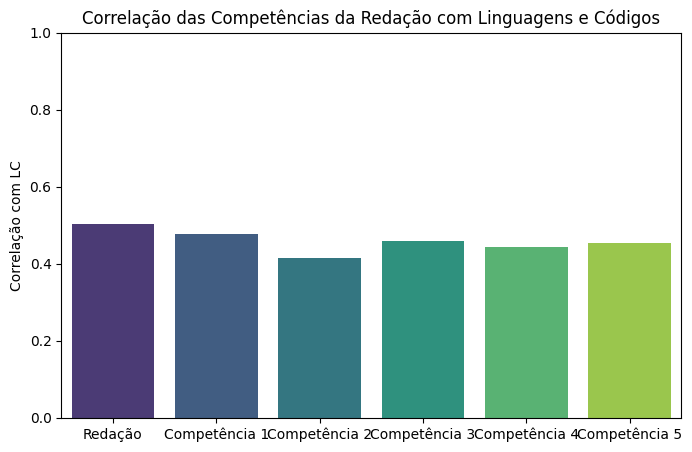

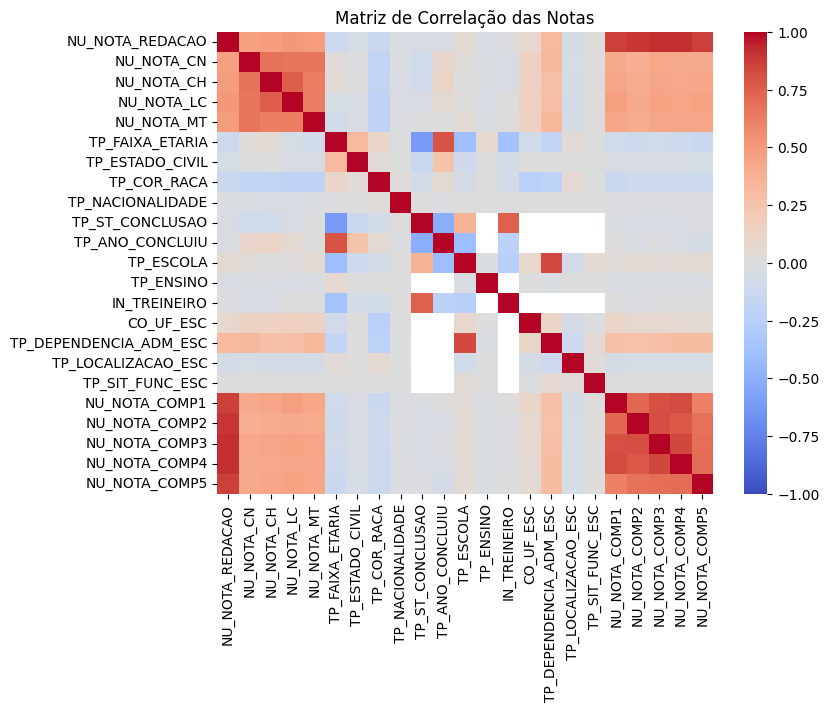

Text(0.5, 1.0, 'Matriz de Correlação das Notas')

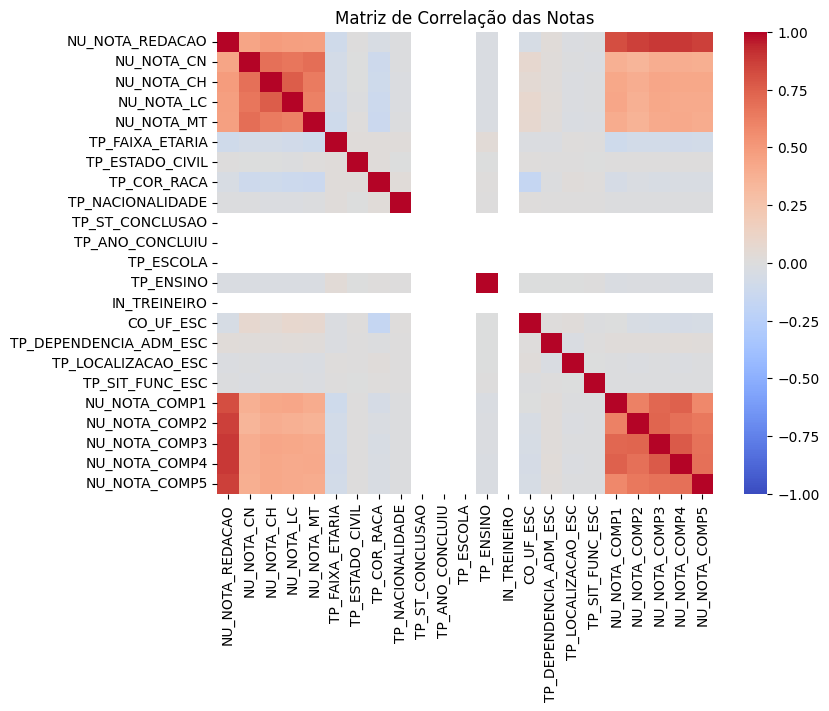

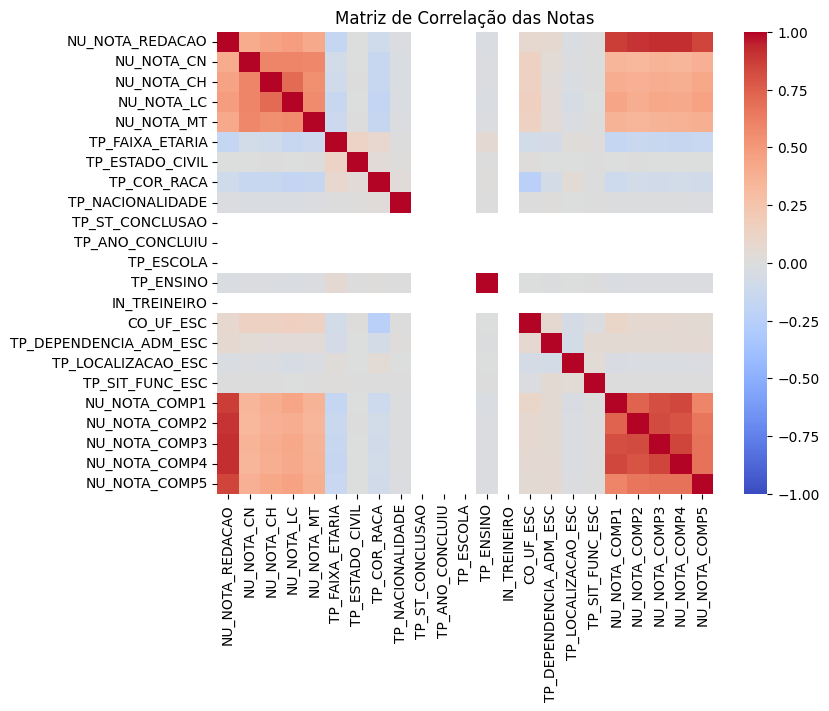

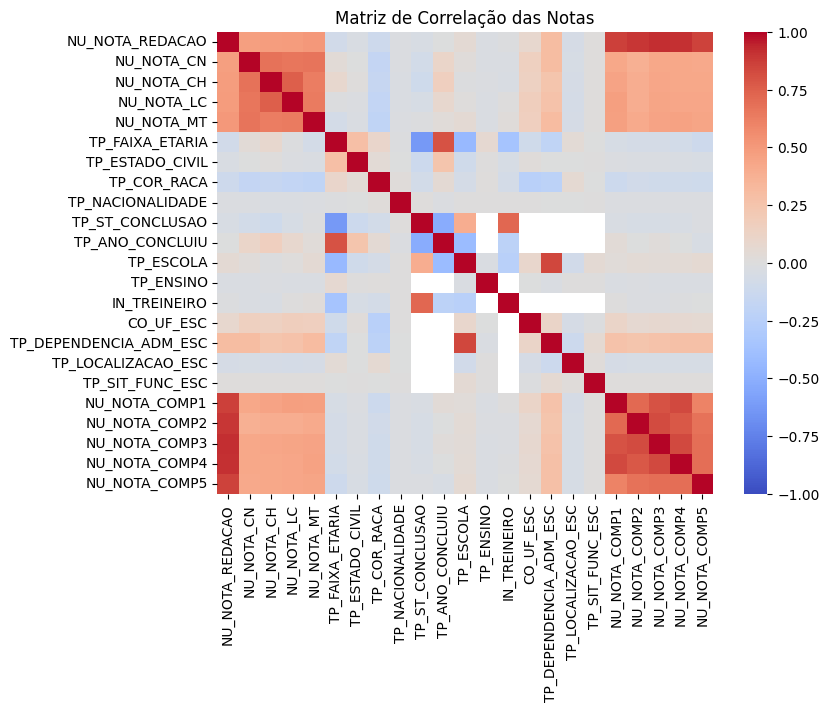

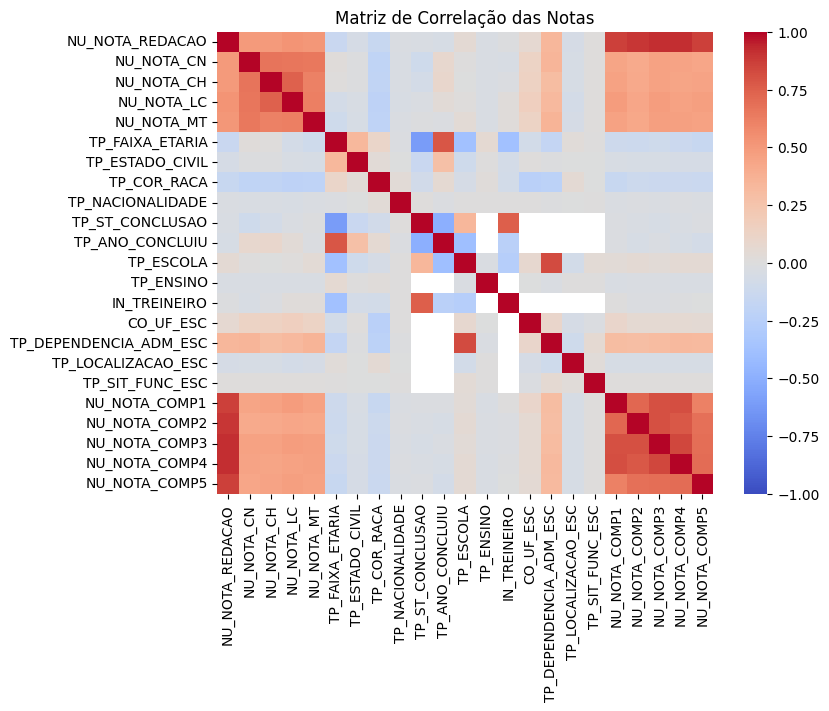

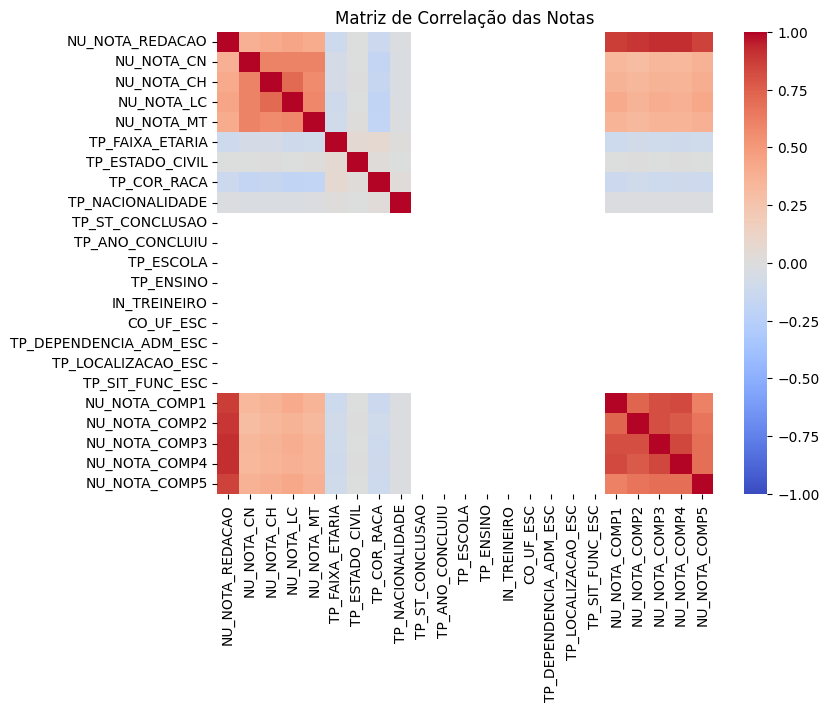

In [13]:
import seaborn as sns

df_publico = df_enem[df_enem["TP_ESCOLA"] == 2]
df_privado = df_enem[df_enem["TP_ESCOLA"] == 3]
df_homens = df_enem[df_enem["TP_SEXO"] == "M"]
df_mulheres = df_enem[df_enem["TP_SEXO"] == "F"]
df_treineiro = df_enem[df_enem["IN_TREINEIRO"] == 1 ]

correlacao_total = df_enem['NU_NOTA_REDACAO'].corr(df_enem['NU_NOTA_LC'])
correlacao_competencia_1 = df_enem['NU_NOTA_COMP1'].corr(df_enem['NU_NOTA_LC'])
correlacao_competencia_2 = df_enem['NU_NOTA_COMP2'].corr(df_enem['NU_NOTA_LC'])
correlacao_competencia_3 = df_enem['NU_NOTA_COMP3'].corr(df_enem['NU_NOTA_LC'])
correlacao_competencia_4 = df_enem['NU_NOTA_COMP4'].corr(df_enem['NU_NOTA_LC'])
correlacao_competencia_5 = df_enem['NU_NOTA_COMP5'].corr(df_enem['NU_NOTA_LC'])

# Plot das correlações individuais
correlacoes = {
    'Redação': correlacao_total,
    'Competência 1': correlacao_competencia_1,
    'Competência 2': correlacao_competencia_2,
    'Competência 3': correlacao_competencia_3,
    'Competência 4': correlacao_competencia_4,
    'Competência 5': correlacao_competencia_5
}

plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(correlacoes.keys()),
    y=list(correlacoes.values()),
    palette="viridis",
    errorbar="ci"
)
plt.ylabel('Correlação com LC')
plt.title('Correlação das Competências da Redação com Linguagens e Códigos')
plt.ylim(0, 1)
plt.show()

# Matriz de correlação
cols = ['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
corr_matrix = df_enem[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas')
plt.show()

cols = ['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
corr_matrix = df_privado[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas')

cols = ['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
corr_matrix = df_publico[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas')

cols = ['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
corr_matrix = df_homens[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas')

cols = ['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
corr_matrix = df_mulheres[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas')

cols = ['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
corr_matrix = df_treineiro[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Notas')